# Bonus: **Machine Learning Project**

## **Imporing the dataset and first inspection**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('housing.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
df.describe(include = 'O')

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


In [6]:
df.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [7]:
df.loc[df.duplicated()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [8]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [10]:
df.loc[df.total_bedrooms.isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


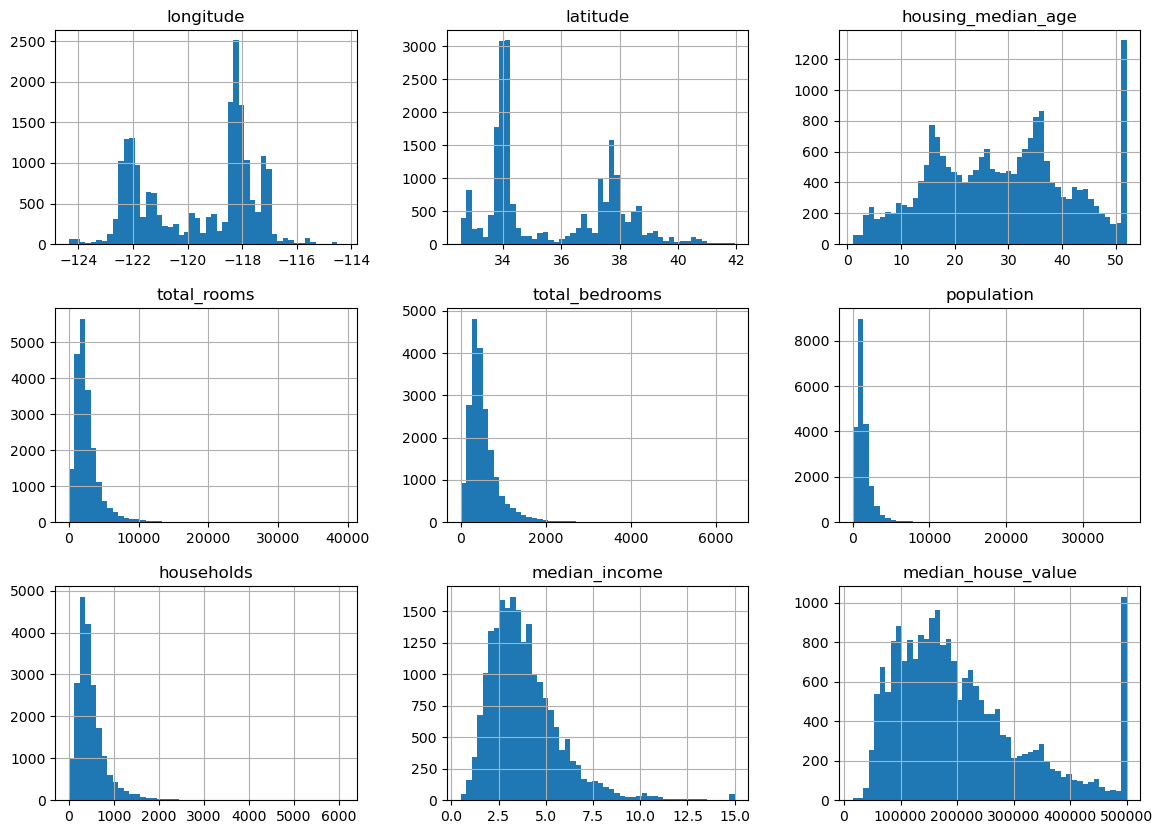

In [11]:
df.hist(bins = 50, figsize = (14, 10))
plt.show()

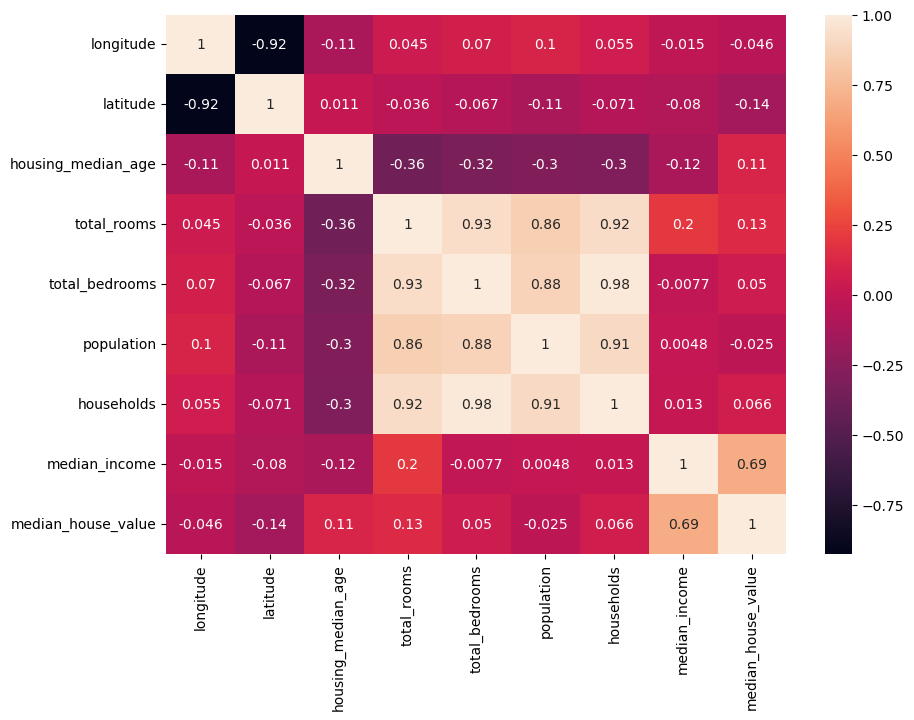

In [12]:
plt.figure(figsize = (10, 7))
sns.heatmap(data = df.corr(numeric_only = True), annot = True)
plt.show()

## **Data cleaning and creating additional features**

In [13]:
df.dropna(inplace = True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [15]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [16]:
df['rooms_per_house_hold'] = df.total_rooms.div(df.households)

In [17]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_house_hold
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853


In [18]:
df.rooms_per_house_hold.nlargest()

1914     141.909091
1979     132.533333
12447     62.422222
1913      61.812500
11862     59.875000
Name: rooms_per_house_hold, dtype: float64

In [19]:
df.rooms_per_house_hold.nsmallest()

5916     0.846154
8219     0.888889
3126     1.000000
14818    1.130435
17820    1.130435
Name: rooms_per_house_hold, dtype: float64

In [20]:
df.loc[[1914, 1979, 5916, 8219]]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_house_hold
1914,-120.10,38.91,33.0,1561.0,282.0,30.0,11.0,1.8750,500001.0,INLAND,141.909091
1979,-120.08,38.80,34.0,1988.0,511.0,36.0,15.0,4.6250,162500.0,INLAND,132.533333
5916,-118.44,34.28,46.0,11.0,11.0,24.0,13.0,2.8750,162500.0,<1H OCEAN,0.846154
8219,-118.21,33.79,33.0,32.0,18.0,96.0,36.0,4.5938,112500.0,NEAR OCEAN,0.888889


In [21]:
df['people_per_household'] = df.population.div(df.households)

In [22]:
df['bedrooms_per_room'] = df.total_bedrooms.div(df.total_rooms)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   longitude             20433 non-null  float64
 1   latitude              20433 non-null  float64
 2   housing_median_age    20433 non-null  float64
 3   total_rooms           20433 non-null  float64
 4   total_bedrooms        20433 non-null  float64
 5   population            20433 non-null  float64
 6   households            20433 non-null  float64
 7   median_income         20433 non-null  float64
 8   median_house_value    20433 non-null  float64
 9   ocean_proximity       20433 non-null  object 
 10  rooms_per_house_hold  20433 non-null  float64
 11  people_per_household  20433 non-null  float64
 12  bedrooms_per_room     20433 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.7+ MB


In [24]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_house_hold,people_per_household,bedrooms_per_room
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,5.431344,3.071533,0.213039
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,2.482946,10.438269,0.057983
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.692308,0.100000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,4.441441,2.429032,0.175427
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,5.230769,2.817582,0.203162
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,6.052381,3.281513,0.239821
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1243.333333,1.000000


In [25]:
df.people_per_household.nlargest(10)

19006    1243.333333
3364      599.714286
16669     502.461538
13034     230.172414
9172       83.171429
12104      63.750000
16420      51.400000
8874       41.214286
13366      33.952941
5986       21.333333
Name: people_per_household, dtype: float64

## **Exploratory data analysis**

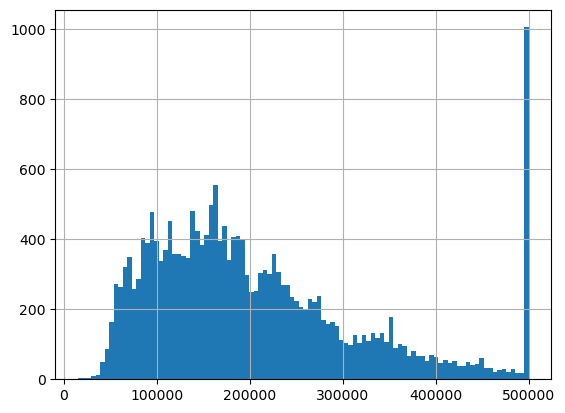

In [26]:
df.median_house_value.hist(bins = 100)
plt.show()

In [27]:
df.loc[df.median_house_value > 500000]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_house_hold,people_per_household,bedrooms_per_room
89,-122.27,37.80,52.0,249.0,78.0,396.0,85.0,1.2434,500001.0,NEAR BAY,2.929412,4.658824,0.313253
459,-122.25,37.87,52.0,609.0,236.0,1349.0,250.0,1.1696,500001.0,NEAR BAY,2.436000,5.396000,0.387521
493,-122.24,37.86,52.0,1668.0,225.0,517.0,214.0,7.8521,500001.0,NEAR BAY,7.794393,2.415888,0.134892
494,-122.24,37.85,52.0,3726.0,474.0,1366.0,496.0,9.3959,500001.0,NEAR BAY,7.512097,2.754032,0.127214
509,-122.23,37.83,52.0,2990.0,379.0,947.0,361.0,7.8772,500001.0,NEAR BAY,8.282548,2.623269,0.126756
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20422,-118.90,34.14,35.0,1503.0,263.0,576.0,216.0,5.1457,500001.0,<1H OCEAN,6.958333,2.666667,0.174983
20426,-118.69,34.18,11.0,1177.0,138.0,415.0,119.0,10.0472,500001.0,<1H OCEAN,9.890756,3.487395,0.117247
20427,-118.80,34.19,4.0,15572.0,2222.0,5495.0,2152.0,8.6499,500001.0,<1H OCEAN,7.236059,2.553439,0.142692
20436,-118.69,34.21,10.0,3663.0,409.0,1179.0,371.0,12.5420,500001.0,<1H OCEAN,9.873315,3.177898,0.111657


In [28]:
df.corr(numeric_only = True).median_house_value.sort_values(ascending = False)

median_house_value      1.000000
median_income           0.688355
rooms_per_house_hold    0.151344
total_rooms             0.133294
housing_median_age      0.106432
households              0.064894
total_bedrooms          0.049686
people_per_household   -0.023639
population             -0.025300
longitude              -0.045398
latitude               -0.144638
bedrooms_per_room      -0.255880
Name: median_house_value, dtype: float64

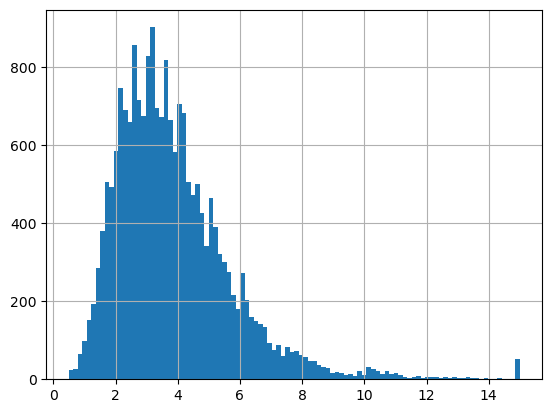

In [29]:
df.median_income.hist(bins = 100)
plt.show()

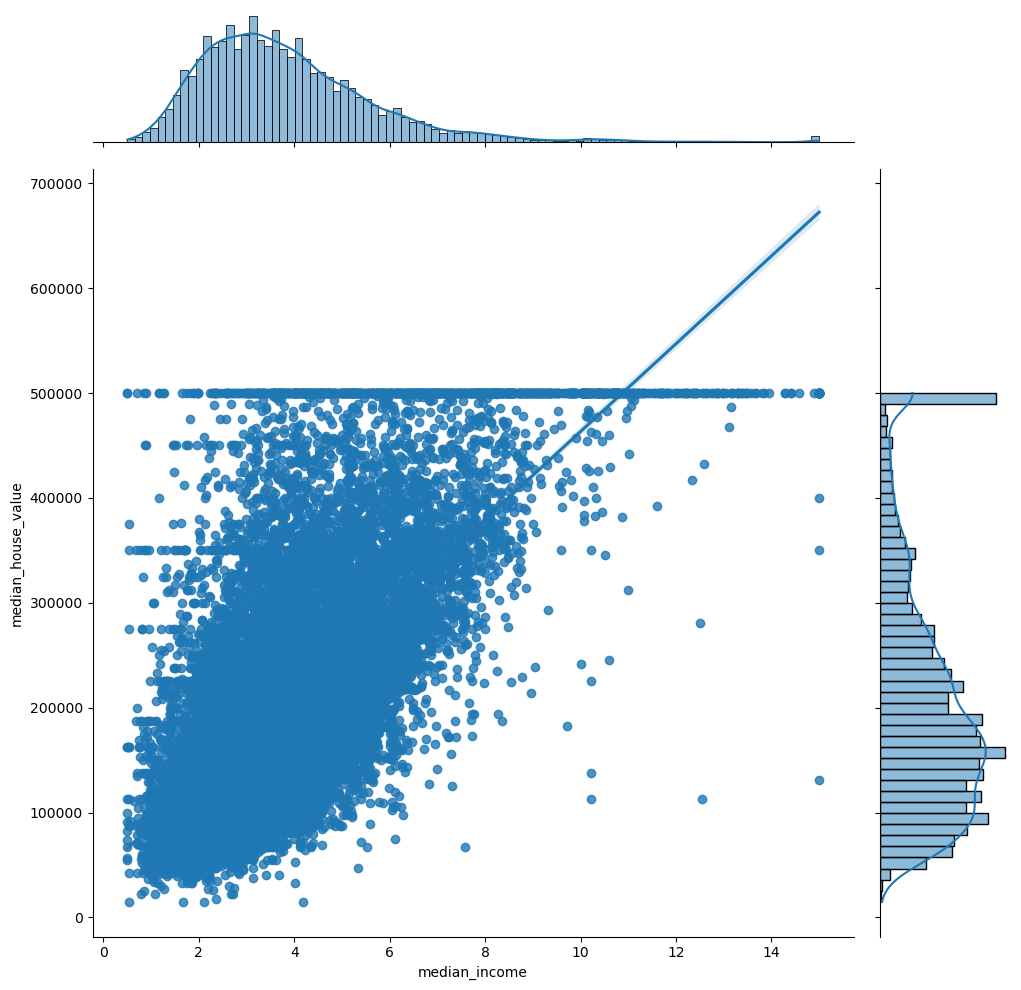

In [30]:
sns.jointplot(data = df, x = 'median_income', y = 'median_house_value', kind = 'reg', height = 10)
plt.show()

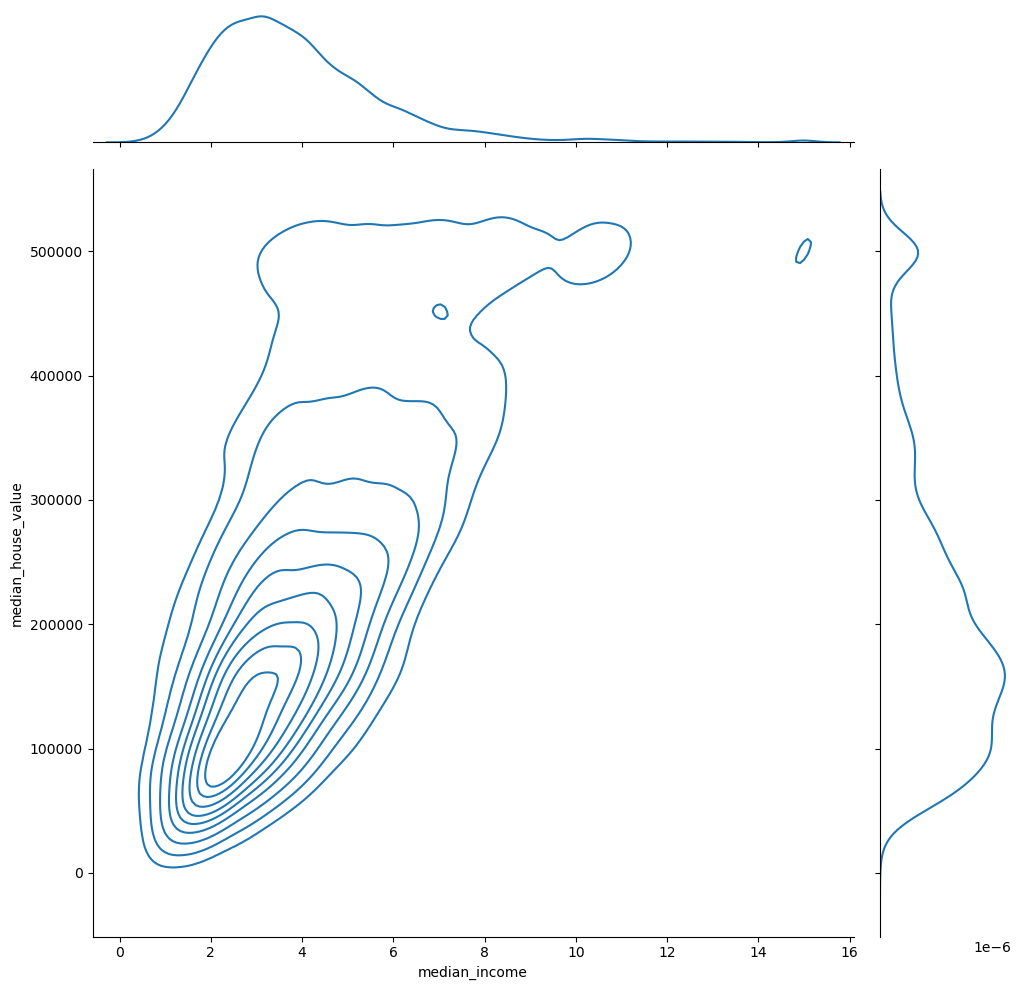

In [31]:
sns.jointplot(data = df, x = 'median_income', y = 'median_house_value', kind = 'kde', height = 10)
plt.show()

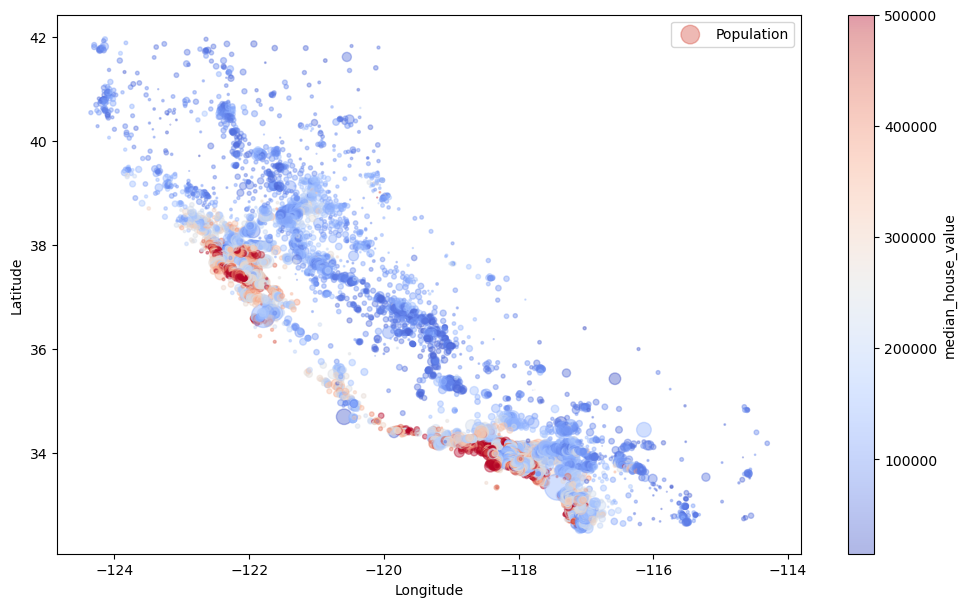

In [32]:
df.plot(
    figsize = (12, 7),
    kind = 'scatter',
    x = 'longitude',
    y = 'latitude',
    s = df.population/100,
    label = 'Population',
    c = 'median_house_value',
    cmap = 'coolwarm',
    colorbar = True,
    alpha = 0.4,
    sharex = False
)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [33]:
import matplotlib.image as mpimg

In [34]:
california_img = mpimg.imread('california.png')

In [35]:
california_img

array([[[0.627451 , 0.7764706, 0.9137255, 1.       ],
        [0.627451 , 0.7764706, 0.9137255, 1.       ],
        [0.627451 , 0.7764706, 0.9137255, 1.       ],
        ...,
        [0.9647059, 0.827451 , 0.6666667, 1.       ],
        [0.9647059, 0.827451 , 0.6666667, 1.       ],
        [0.9647059, 0.827451 , 0.6666667, 1.       ]],

       [[0.627451 , 0.7764706, 0.9137255, 1.       ],
        [0.627451 , 0.7764706, 0.9137255, 1.       ],
        [0.627451 , 0.7764706, 0.9137255, 1.       ],
        ...,
        [0.9647059, 0.827451 , 0.6666667, 1.       ],
        [0.9647059, 0.827451 , 0.6666667, 1.       ],
        [0.9647059, 0.827451 , 0.6666667, 1.       ]],

       [[0.627451 , 0.7764706, 0.9137255, 1.       ],
        [0.627451 , 0.7764706, 0.9137255, 1.       ],
        [0.627451 , 0.7764706, 0.9137255, 1.       ],
        ...,
        [0.9647059, 0.827451 , 0.6666667, 1.       ],
        [0.9647059, 0.827451 , 0.6666667, 1.       ],
        [0.9647059, 0.827451 , 0.666666

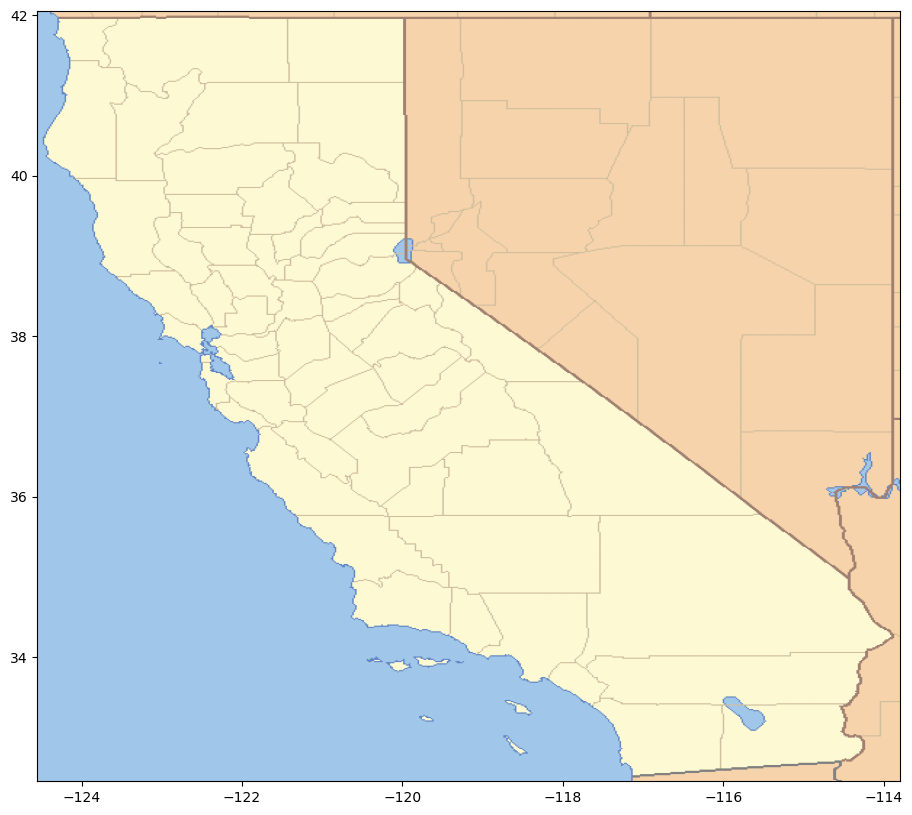

In [36]:
plt.figure(figsize = (15, 10))
plt.imshow(california_img, extent = [-124.55, -113.80, 32.45, 42.05])
plt.show()

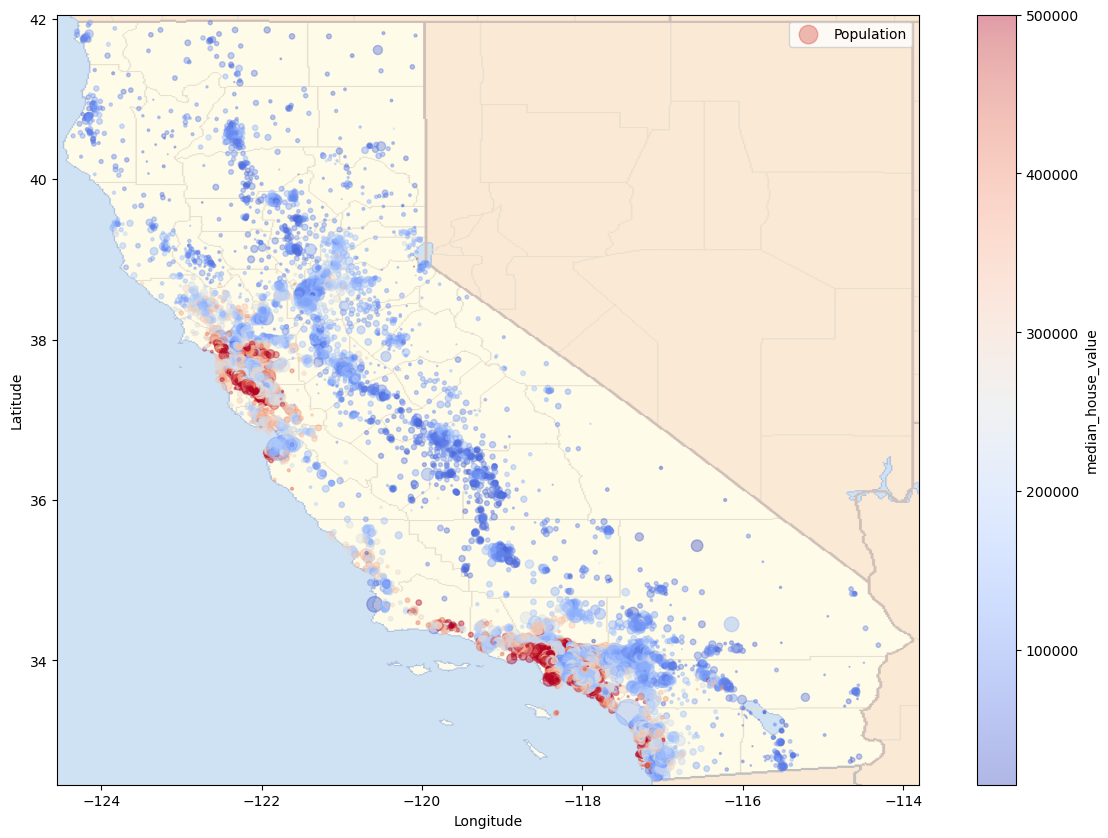

In [37]:
df.plot(
    figsize = (15, 10),
    kind = 'scatter',
    x = 'longitude',
    y = 'latitude',
    s = df.population/100,
    label = 'Population',
    c = 'median_house_value',
    cmap = 'coolwarm',
    colorbar = True,
    alpha = 0.4,
    sharex = False
)
plt.imshow(california_img, extent = [-124.55, -113.80, 32.45, 42.05], alpha = 0.5, cmap = plt.get_cmap('jet'))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [38]:
prox = df.ocean_proximity.unique()

In [39]:
prox

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [40]:
df_near_ocean = df.loc[df.ocean_proximity == prox[3]].copy()

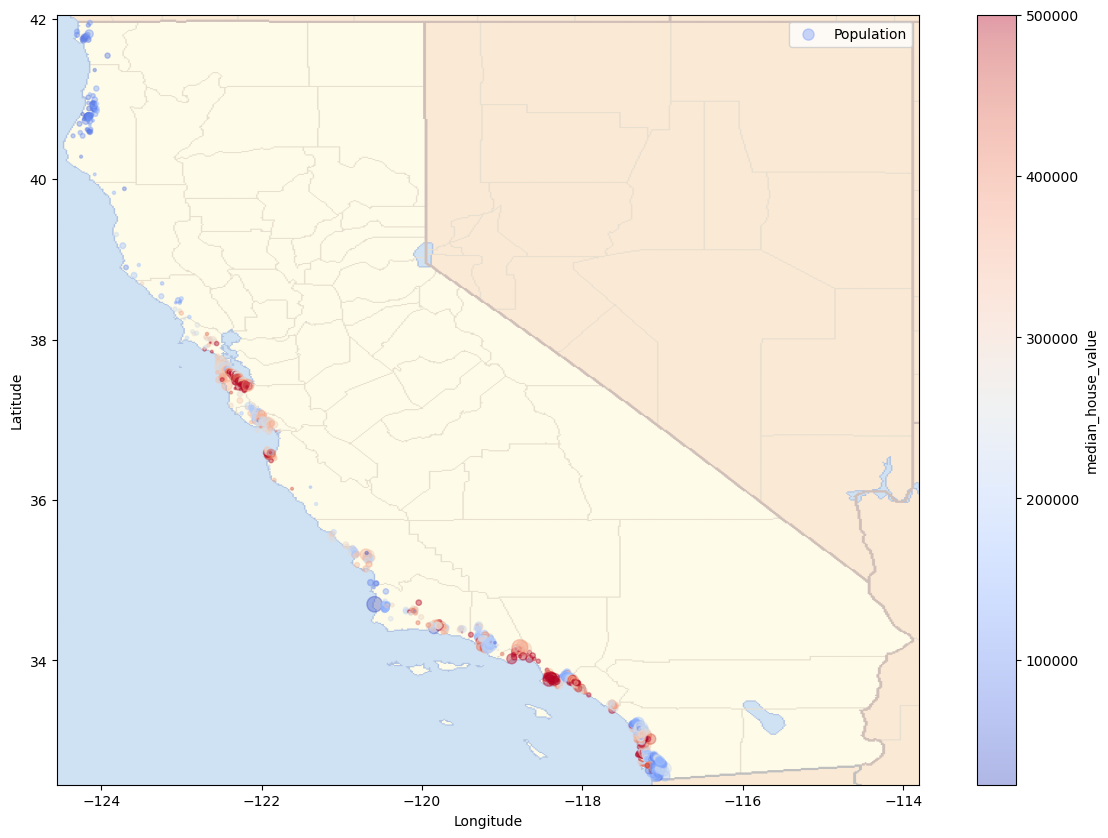

In [41]:
df_near_ocean.plot(
    figsize = (15, 10),
    kind = 'scatter',
    x = 'longitude',
    y = 'latitude',
    s = df_near_ocean.population/100,
    label = 'Population',
    c = 'median_house_value',
    cmap = 'coolwarm',
    colorbar = True,
    alpha = 0.4,
    sharex = False
)
plt.imshow(california_img, extent = [-124.55, -113.80, 32.45, 42.05], alpha = 0.5, cmap = plt.get_cmap('jet'))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [42]:
pd.qcut(df.median_income, q = [0, 0.25, 0.50, 0.75, 0.95, 1])

0           (7.3, 15.0]
1           (7.3, 15.0]
2          (4.744, 7.3]
3          (4.744, 7.3]
4        (3.536, 4.744]
              ...      
20635    (0.499, 2.564]
20636    (0.499, 2.564]
20637    (0.499, 2.564]
20638    (0.499, 2.564]
20639    (0.499, 2.564]
Name: median_income, Length: 20433, dtype: category
Categories (5, interval[float64, right]): [(0.499, 2.564] < (2.564, 3.536] < (3.536, 4.744] < (4.744, 7.3] < (7.3, 15.0]]

In [43]:
df['median_income_cat'] = pd.qcut(
    df.median_income,
    q = [0, 0.25, 0.50, 0.75, 0.95, 1],
    labels = ['Low', 'Below average', 'Above average', 'High', 'Very high']
)

In [44]:
df.median_income_cat

0            Very high
1            Very high
2                 High
3                 High
4        Above average
             ...      
20635              Low
20636              Low
20637              Low
20638              Low
20639              Low
Name: median_income_cat, Length: 20433, dtype: category
Categories (5, object): ['Low' < 'Below average' < 'Above average' < 'High' < 'Very high']

In [45]:
df.median_income_cat.value_counts(normalize = True)

median_income_cat
Low              0.250037
Above average    0.250037
Below average    0.249988
High             0.199922
Very high        0.050017
Name: proportion, dtype: float64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   longitude             20433 non-null  float64 
 1   latitude              20433 non-null  float64 
 2   housing_median_age    20433 non-null  float64 
 3   total_rooms           20433 non-null  float64 
 4   total_bedrooms        20433 non-null  float64 
 5   population            20433 non-null  float64 
 6   households            20433 non-null  float64 
 7   median_income         20433 non-null  float64 
 8   median_house_value    20433 non-null  float64 
 9   ocean_proximity       20433 non-null  object  
 10  rooms_per_house_hold  20433 non-null  float64 
 11  people_per_household  20433 non-null  float64 
 12  bedrooms_per_room     20433 non-null  float64 
 13  median_income_cat     20433 non-null  category
dtypes: category(1), float64(12), object(1)
memory usage: 2.7+ M

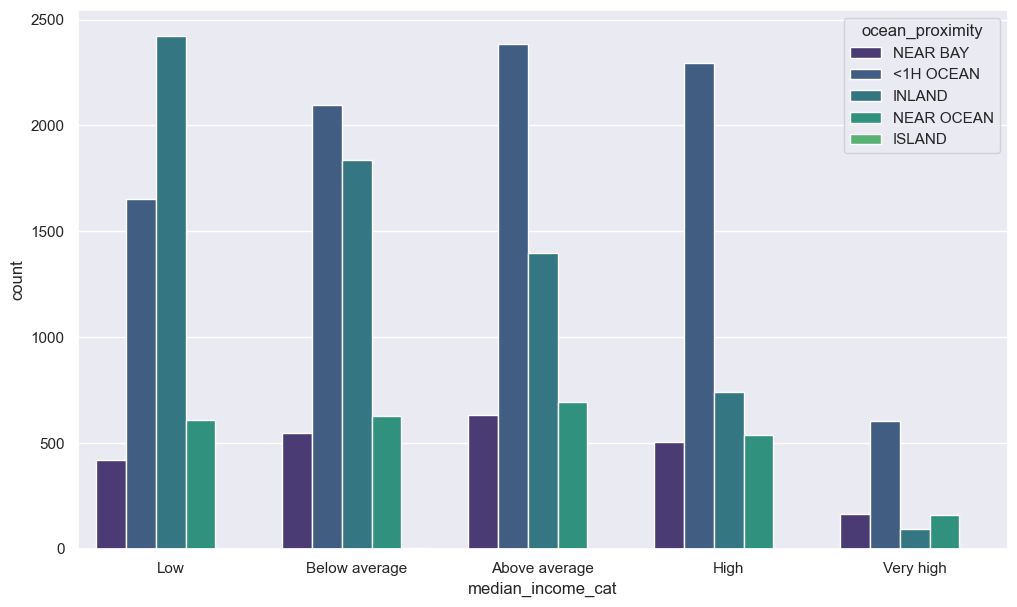

In [47]:
plt.figure(figsize = (12,7))
sns.set(palette = 'viridis')
sns.countplot(data = df, x = 'median_income_cat', hue = 'ocean_proximity')
plt.show()

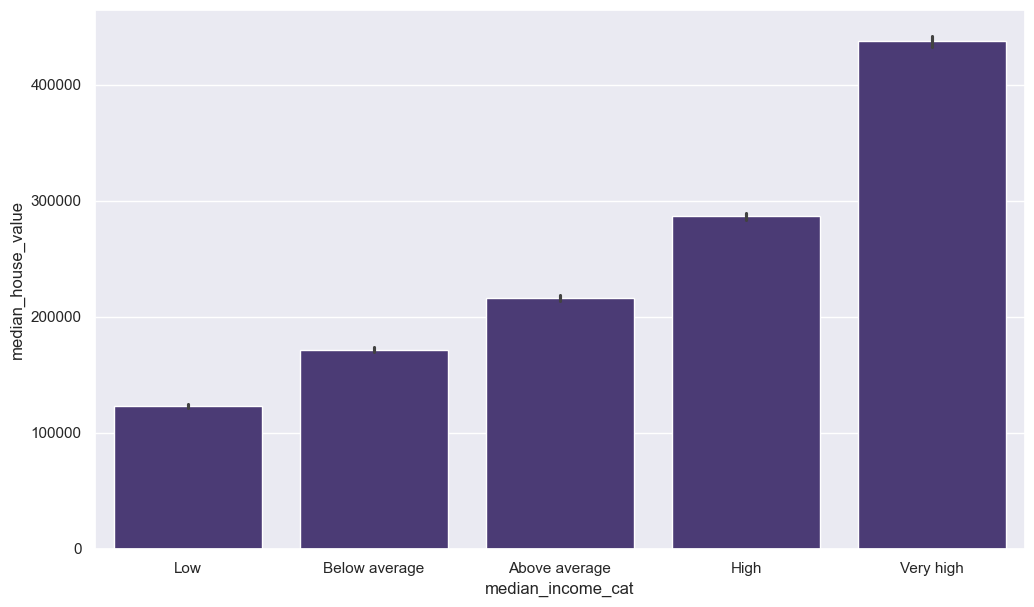

In [48]:
plt.figure(figsize = (12,7))
# sns.set(palette = 'viridis')
sns.barplot(data = df, x = 'median_income_cat', y = 'median_house_value', dodge = True)
plt.show()

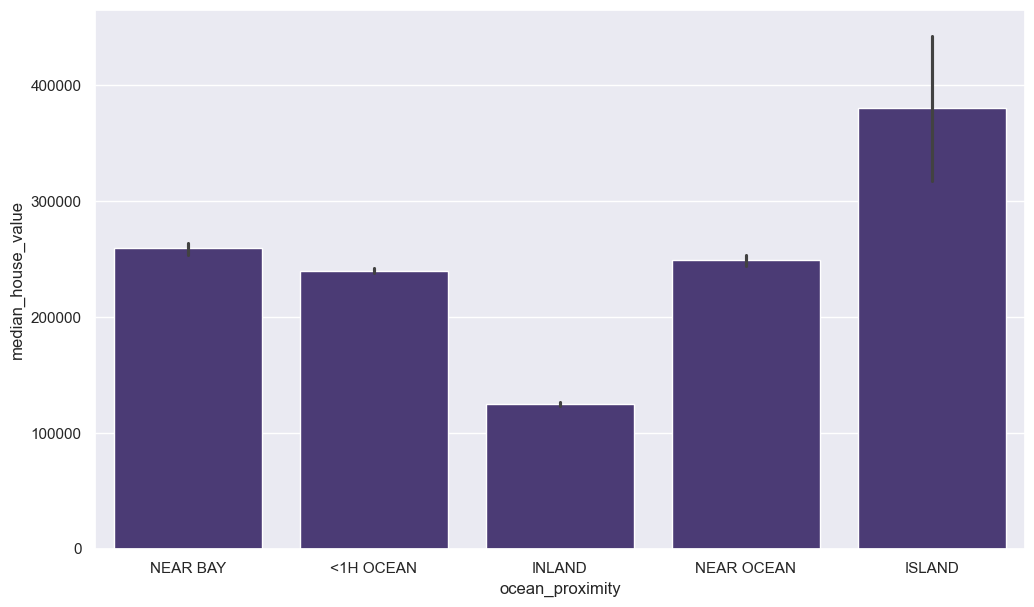

In [49]:
plt.figure(figsize = (12,7))
# sns.set(palette = 'viridis')
sns.barplot(data = df, x = 'ocean_proximity', y = 'median_house_value', dodge = True)
plt.show()

In [50]:
matrix = df.groupby(['median_income_cat', 'ocean_proximity']).median_house_value.mean().unstack().drop(columns = ['ISLAND'])

C:\Users\Oggy\AppData\Local\Temp\ipykernel_8792\1574620916.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  matrix = df.groupby(['median_income_cat', 'ocean_proximity']).median_house_value.mean().unstack().drop(columns = ['ISLAND'])


In [51]:
matrix

ocean_proximity,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
median_income_cat,,,,
Low,161337.076923,84820.626650,155122.052133,148027.826514
Below average,197236.013829,115124.088283,220196.177656,208665.190096
Above average,232278.358759,147846.891351,261965.251582,255293.813584
High,292208.766217,208095.566622,322566.033663,337446.227778
Very high,439784.235489,347571.736842,451015.078788,468739.723270


In [52]:
matrix.astype('int')

ocean_proximity,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
median_income_cat,,,,
Low,161337,84820,155122,148027
Below average,197236,115124,220196,208665
Above average,232278,147846,261965,255293
High,292208,208095,322566,337446
Very high,439784,347571,451015,468739


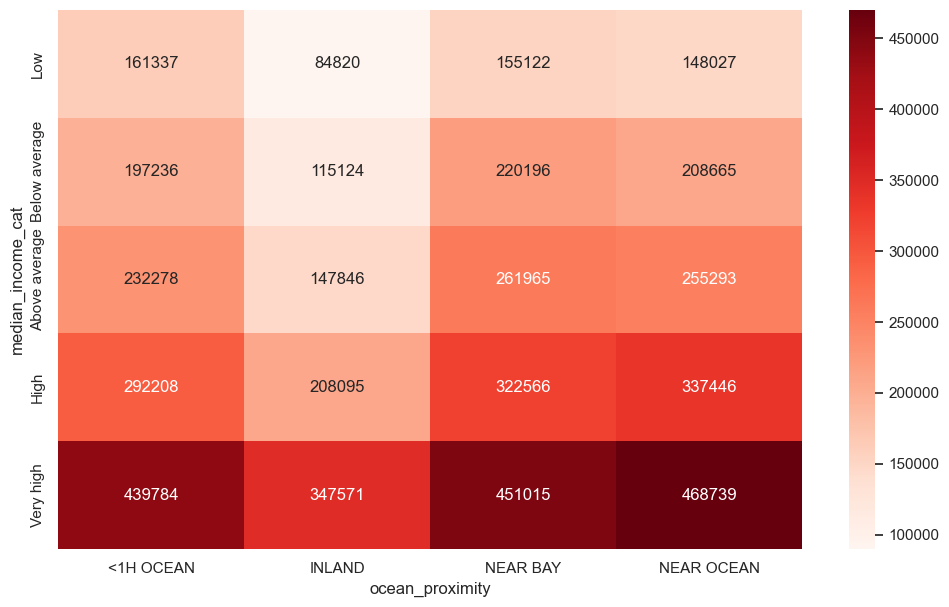

In [53]:
plt.figure(figsize = (12, 7))
sns.heatmap(data = matrix.astype('int'), annot = True, fmt = 'd', cmap = 'Reds', vmin = 90000, vmax = 470000)
plt.show()

## **Feature engineering**

In [54]:
label = df.median_house_value.copy()
label

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [55]:
features = df.drop(columns = ['median_house_value'])

In [56]:
features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_house_hold,people_per_household,bedrooms_per_room,median_income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,6.984127,2.555556,0.146591,Very high
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,6.238137,2.109842,0.155797,Very high
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,8.288136,2.802260,0.129516,High
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,5.817352,2.547945,0.184458,High
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,6.281853,2.181467,0.172096,Above average
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,5.045455,2.560606,0.224625,Low
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,6.114035,3.122807,0.215208,Low
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,5.205543,2.325635,0.215173,Low
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,5.329513,2.123209,0.219892,Low


In [57]:
features.select_dtypes('float')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house_hold,people_per_household,bedrooms_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,6.984127,2.555556,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,6.238137,2.109842,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,8.288136,2.802260,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,5.817352,2.547945,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,6.281853,2.181467,0.172096
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,5.045455,2.560606,0.224625
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,6.114035,3.122807,0.215208
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,5.205543,2.325635,0.215173
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,5.329513,2.123209,0.219892


In [58]:
import scipy.stats as stats

In [59]:
features_1 = features.select_dtypes('float').apply(lambda x: stats.zscore(x))

In [60]:
features_1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house_hold,people_per_household,bedrooms_per_room
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,0.625395,-0.049433,-1.146024
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,0.324942,-0.092134,-0.987254
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,1.150594,-0.025797,-1.440514
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,0.155467,-0.050162,-0.492925
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,0.342549,-0.085272,-0.706141
...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.758318,1.800677,-0.288535,-0.444580,-0.388895,-0.511787,-0.443207,-1.216727,-0.155420,-0.048949,0.199820
20636,-0.818212,1.805358,-0.844466,-0.887557,-0.920488,-0.943315,-1.008223,-0.692044,0.274959,0.004912,0.037412
20637,-0.823203,1.777272,-0.923885,-0.175042,-0.125472,-0.368826,-0.173778,-1.143171,-0.090943,-0.071460,0.036808
20638,-0.873115,1.777272,-0.844466,-0.355344,-0.305834,-0.603564,-0.393506,-1.055136,-0.041013,-0.090853,0.118204


In [61]:
pd.options.display.float_format = '{:.2f}'.format

In [62]:
features_1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house_hold,people_per_household,bedrooms_per_room
0,-1.33,1.05,0.98,-0.80,-0.97,-0.97,-0.98,2.35,0.63,-0.05,-1.15
1,-1.32,1.04,-0.61,2.04,1.35,0.86,1.67,2.33,0.32,-0.09,-0.99
2,-1.33,1.04,1.86,-0.54,-0.83,-0.82,-0.84,1.78,1.15,-0.03,-1.44
3,-1.34,1.04,1.86,-0.62,-0.72,-0.77,-0.73,0.93,0.16,-0.05,-0.49
4,-1.34,1.04,1.86,-0.46,-0.61,-0.76,-0.63,-0.01,0.34,-0.09,-0.71
...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.76,1.80,-0.29,-0.44,-0.39,-0.51,-0.44,-1.22,-0.16,-0.05,0.20
20636,-0.82,1.81,-0.84,-0.89,-0.92,-0.94,-1.01,-0.69,0.27,0.00,0.04
20637,-0.82,1.78,-0.92,-0.18,-0.13,-0.37,-0.17,-1.14,-0.09,-0.07,0.04
20638,-0.87,1.78,-0.84,-0.36,-0.31,-0.60,-0.39,-1.06,-0.04,-0.09,0.12


In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
sc = StandardScaler()

In [65]:
features_2 = sc.fit_transform(features.select_dtypes('float'))

In [66]:
pd.DataFrame(features_2, columns = features.select_dtypes('float').columns)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house_hold,people_per_household,bedrooms_per_room
0,-1.33,1.05,0.98,-0.80,-0.97,-0.97,-0.98,2.35,0.63,-0.05,-1.15
1,-1.32,1.04,-0.61,2.04,1.35,0.86,1.67,2.33,0.32,-0.09,-0.99
2,-1.33,1.04,1.86,-0.54,-0.83,-0.82,-0.84,1.78,1.15,-0.03,-1.44
3,-1.34,1.04,1.86,-0.62,-0.72,-0.77,-0.73,0.93,0.16,-0.05,-0.49
4,-1.34,1.04,1.86,-0.46,-0.61,-0.76,-0.63,-0.01,0.34,-0.09,-0.71
...,...,...,...,...,...,...,...,...,...,...,...
20428,-0.76,1.80,-0.29,-0.44,-0.39,-0.51,-0.44,-1.22,-0.16,-0.05,0.20
20429,-0.82,1.81,-0.84,-0.89,-0.92,-0.94,-1.01,-0.69,0.27,0.00,0.04
20430,-0.82,1.78,-0.92,-0.18,-0.13,-0.37,-0.17,-1.14,-0.09,-0.07,0.04
20431,-0.87,1.78,-0.84,-0.36,-0.31,-0.60,-0.39,-1.06,-0.04,-0.09,0.12


In [67]:
features.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [68]:
dummies = pd.get_dummies(features.ocean_proximity, dtype = 'int')

In [69]:
dummies

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [70]:
features = pd.concat([features_1, dummies, df.median_income_cat], axis = 1)

In [71]:
features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house_hold,people_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_income_cat
0,-1.33,1.05,0.98,-0.80,-0.97,-0.97,-0.98,2.35,0.63,-0.05,-1.15,0,0,0,1,0,Very high
1,-1.32,1.04,-0.61,2.04,1.35,0.86,1.67,2.33,0.32,-0.09,-0.99,0,0,0,1,0,Very high
2,-1.33,1.04,1.86,-0.54,-0.83,-0.82,-0.84,1.78,1.15,-0.03,-1.44,0,0,0,1,0,High
3,-1.34,1.04,1.86,-0.62,-0.72,-0.77,-0.73,0.93,0.16,-0.05,-0.49,0,0,0,1,0,High
4,-1.34,1.04,1.86,-0.46,-0.61,-0.76,-0.63,-0.01,0.34,-0.09,-0.71,0,0,0,1,0,Above average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.76,1.80,-0.29,-0.44,-0.39,-0.51,-0.44,-1.22,-0.16,-0.05,0.20,0,1,0,0,0,Low
20636,-0.82,1.81,-0.84,-0.89,-0.92,-0.94,-1.01,-0.69,0.27,0.00,0.04,0,1,0,0,0,Low
20637,-0.82,1.78,-0.92,-0.18,-0.13,-0.37,-0.17,-1.14,-0.09,-0.07,0.04,0,1,0,0,0,Low
20638,-0.87,1.78,-0.84,-0.36,-0.31,-0.60,-0.39,-1.06,-0.04,-0.09,0.12,0,1,0,0,0,Low


## **Split the data into train and test sets**

In [72]:
features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house_hold,people_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_income_cat
0,-1.33,1.05,0.98,-0.80,-0.97,-0.97,-0.98,2.35,0.63,-0.05,-1.15,0,0,0,1,0,Very high
1,-1.32,1.04,-0.61,2.04,1.35,0.86,1.67,2.33,0.32,-0.09,-0.99,0,0,0,1,0,Very high
2,-1.33,1.04,1.86,-0.54,-0.83,-0.82,-0.84,1.78,1.15,-0.03,-1.44,0,0,0,1,0,High
3,-1.34,1.04,1.86,-0.62,-0.72,-0.77,-0.73,0.93,0.16,-0.05,-0.49,0,0,0,1,0,High
4,-1.34,1.04,1.86,-0.46,-0.61,-0.76,-0.63,-0.01,0.34,-0.09,-0.71,0,0,0,1,0,Above average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.76,1.80,-0.29,-0.44,-0.39,-0.51,-0.44,-1.22,-0.16,-0.05,0.20,0,1,0,0,0,Low
20636,-0.82,1.81,-0.84,-0.89,-0.92,-0.94,-1.01,-0.69,0.27,0.00,0.04,0,1,0,0,0,Low
20637,-0.82,1.78,-0.92,-0.18,-0.13,-0.37,-0.17,-1.14,-0.09,-0.07,0.04,0,1,0,0,0,Low
20638,-0.87,1.78,-0.84,-0.36,-0.31,-0.60,-0.39,-1.06,-0.04,-0.09,0.12,0,1,0,0,0,Low


In [73]:
test_size = 0.2

In [74]:
X_test = features.sample(frac = 0.2, random_state = 123)

In [75]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house_hold,people_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_income_cat
14354,1.17,-1.35,-0.45,-0.10,0.27,-0.13,0.25,-0.39,-0.56,-0.09,0.99,0,0,0,0,1,Below average
12908,-0.86,1.40,-0.37,0.11,-0.03,-0.12,-0.03,-0.29,0.18,-0.04,-0.51,0,1,0,0,0,Below average
19545,-0.70,0.93,0.82,-0.13,0.16,0.55,0.28,-1.14,-0.62,0.03,0.76,0,1,0,0,0,Low
12188,1.11,-0.91,-1.40,-0.64,-0.72,-0.74,-0.81,-0.40,0.42,-0.00,-0.36,1,0,0,0,0,Below average
14786,1.22,-1.43,-0.61,-0.41,-0.58,-0.39,-0.53,0.50,0.16,0.02,-0.75,0,0,0,0,1,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10262,0.85,-0.82,-0.69,0.61,0.01,0.41,0.11,1.43,0.77,0.04,-1.33,1,0,0,0,0,High
3614,0.58,-0.65,0.74,-0.98,-1.04,-0.90,-1.04,-0.39,-0.21,0.09,-0.12,1,0,0,0,0,Below average
19296,-1.62,1.30,0.90,-0.11,-0.27,-0.33,-0.19,0.01,0.09,-0.06,-0.64,1,0,0,0,0,Above average
5826,0.63,-0.68,1.86,-0.43,-0.62,-0.60,-0.62,0.49,0.43,-0.02,-0.87,1,0,0,0,0,High


In [76]:
X_test.median_income_cat.value_counts(normalize = True)

median_income_cat
Above average   0.25
Below average   0.25
Low             0.25
High            0.20
Very high       0.05
Name: proportion, dtype: float64

In [77]:
features.median_income_cat.value_counts(normalize = True)

median_income_cat
Low             0.25
Above average   0.25
Below average   0.25
High            0.20
Very high       0.05
Name: proportion, dtype: float64

In [78]:
X_test.index

Index([14354, 12908, 19545, 12188, 14786,  9941,  3179,  4650, 15550, 17190,
       ...
        3992, 10261, 10862, 10863, 13864, 10262,  3614, 19296,  5826, 15383],
      dtype='int64', length=4087)

In [79]:
X_train = features.loc[~features.index.isin(X_test.index)]

In [80]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house_hold,people_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_income_cat
0,-1.33,1.05,0.98,-0.80,-0.97,-0.97,-0.98,2.35,0.63,-0.05,-1.15,0,0,0,1,0,Very high
1,-1.32,1.04,-0.61,2.04,1.35,0.86,1.67,2.33,0.32,-0.09,-0.99,0,0,0,1,0,Very high
2,-1.33,1.04,1.86,-0.54,-0.83,-0.82,-0.84,1.78,1.15,-0.03,-1.44,0,0,0,1,0,High
3,-1.34,1.04,1.86,-0.62,-0.72,-0.77,-0.73,0.93,0.16,-0.05,-0.49,0,0,0,1,0,High
4,-1.34,1.04,1.86,-0.46,-0.61,-0.76,-0.63,-0.01,0.34,-0.09,-0.71,0,0,0,1,0,Above average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.76,1.80,-0.29,-0.44,-0.39,-0.51,-0.44,-1.22,-0.16,-0.05,0.20,0,1,0,0,0,Low
20636,-0.82,1.81,-0.84,-0.89,-0.92,-0.94,-1.01,-0.69,0.27,0.00,0.04,0,1,0,0,0,Low
20637,-0.82,1.78,-0.92,-0.18,-0.13,-0.37,-0.17,-1.14,-0.09,-0.07,0.04,0,1,0,0,0,Low
20638,-0.87,1.78,-0.84,-0.36,-0.31,-0.60,-0.39,-1.06,-0.04,-0.09,0.12,0,1,0,0,0,Low


In [81]:
X_train.median_income_cat.value_counts(normalize = True)

median_income_cat
Low             0.25
Below average   0.25
Above average   0.25
High            0.20
Very high       0.05
Name: proportion, dtype: float64

In [82]:
X_train = X_train.sample(frac = 1, random_state = 123)

In [83]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house_hold,people_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_income_cat
9896,-1.34,1.24,-1.48,-0.76,-0.90,-0.83,-0.84,1.43,-0.02,-0.04,-0.83,0,0,0,1,0,High
6749,0.74,-0.71,1.06,-0.00,-0.03,0.06,0.06,0.04,-0.16,-0.02,-0.23,1,0,0,0,0,Above average
13825,1.21,-0.54,0.19,-1.09,-1.15,-1.09,-1.16,-0.92,-0.25,0.03,-0.09,0,1,0,0,0,Low
2842,0.29,-0.11,0.59,-0.55,-0.63,-0.66,-0.63,-0.47,0.06,-0.04,-0.41,0,1,0,0,0,Below average
10112,0.81,-0.79,0.11,-0.48,-0.55,-0.51,-0.50,0.34,-0.11,-0.03,-0.36,1,0,0,0,0,Above average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15460,1.14,-1.16,-1.40,-0.04,-0.22,-0.42,-0.13,0.10,0.11,-0.09,-0.68,0,0,0,0,1,Above average
1689,-1.34,1.12,-1.88,0.55,0.59,0.55,0.57,0.62,-0.02,-0.02,-0.15,0,0,0,1,0,High
14698,1.24,-1.33,0.19,-0.28,-0.29,-0.49,-0.30,-0.36,-0.08,-0.08,-0.11,0,0,0,0,1,Below average
19870,0.11,0.33,-1.40,0.27,0.19,-0.07,0.17,-0.47,0.11,-0.07,-0.37,0,1,0,0,0,Below average


In [84]:
X_train.drop(columns = ['median_income_cat'], inplace = True)

In [85]:
X_test.drop(columns = ['median_income_cat'], inplace = True)

In [86]:
y_train = label.loc[X_train.index]

In [87]:
y_test = label.loc[X_test.index]

## **Training the model**

In [88]:
from sklearn.ensemble import RandomForestRegressor

In [89]:
rfr = RandomForestRegressor(
    random_state = 42,
    n_estimators = 500,
    max_features = 'sqrt',
    max_depth = 75,
    min_samples_split = 2
)

In [90]:
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=75, max_features='sqrt', n_estimators=500,
                      random_state=42)

In [91]:
r2_train = rfr.score(X_train, y_train)

In [92]:
r2_train

0.9758470860678036

In [93]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error

In [94]:
y_train_pred = rfr.predict(X_train)

In [95]:
y_train_pred

array([238374.608, 246813.8  ,  74191.4  , ..., 184930.402, 117595.4  ,
       187186.008])

In [96]:
rfr_mse_train = mean_squared_error(y_train, y_train_pred)

In [97]:
rfr_rmse_train = np.sqrt(rfr_mse_train)

In [98]:
rfr_rmse_train

18023.671210966968

In [99]:
rfr_rmse_train2 = root_mean_squared_error(y_train, y_train_pred)

In [100]:
rfr_rmse_train2

18023.671210966968

## **Testing the model**

In [101]:
r2_test = rfr.score(X_test, y_test)

In [102]:
r2_test

0.825152593253362

In [103]:
y_test_pred = rfr.predict(X_test)

In [104]:
rfr_mse_test = mean_squared_error(y_test, y_test_pred)

In [105]:
rfr_rmse_test = np.sqrt(rfr_mse_test)

In [106]:
rfr_rmse_test

47348.34022326726

In [107]:
rfr_rmse_test2 = root_mean_squared_error(y_test, y_test_pred)

In [108]:
rfr_rmse_test2

47348.34022326726

In [109]:
from sklearn.metrics import mean_absolute_error

In [110]:
mae_test = mean_absolute_error(y_test, y_test_pred)

In [111]:
mae_test

31722.632696354292

## **Feature importance**

In [112]:
feature_importance = pd.Series(data = rfr.feature_importances_, index = rfr.feature_names_in_)

In [113]:
feature_importance.sort_values(ascending = False, inplace = True)

In [114]:
feature_importance

median_income          0.28
INLAND                 0.14
people_per_household   0.10
bedrooms_per_room      0.10
longitude              0.08
latitude               0.08
rooms_per_house_hold   0.07
housing_median_age     0.04
total_rooms            0.02
population             0.02
total_bedrooms         0.02
households             0.02
<1H OCEAN              0.02
NEAR OCEAN             0.01
NEAR BAY               0.01
ISLAND                 0.00
dtype: float64

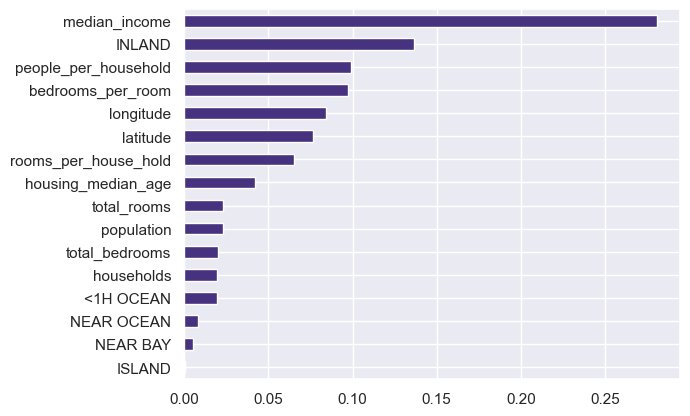

In [115]:
feature_importance.sort_values().plot(kind = 'barh')
plt.show()